# CM

## FF

**1.uram-before**

prd:
/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy

true:
/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy


**2.uram_after-abl**

prd:
/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy

true:
/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy

**3.uram-after**

prd:
/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy

true:
/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy

In [2]:
import sklearn

In [3]:
help(sklearn.metrics.confusion_matrix)

AttributeError: module 'sklearn' has no attribute 'metrics'

/tmp/ipykernel_35131/3876280634.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_35131/3876280634.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_35131/3876280634.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


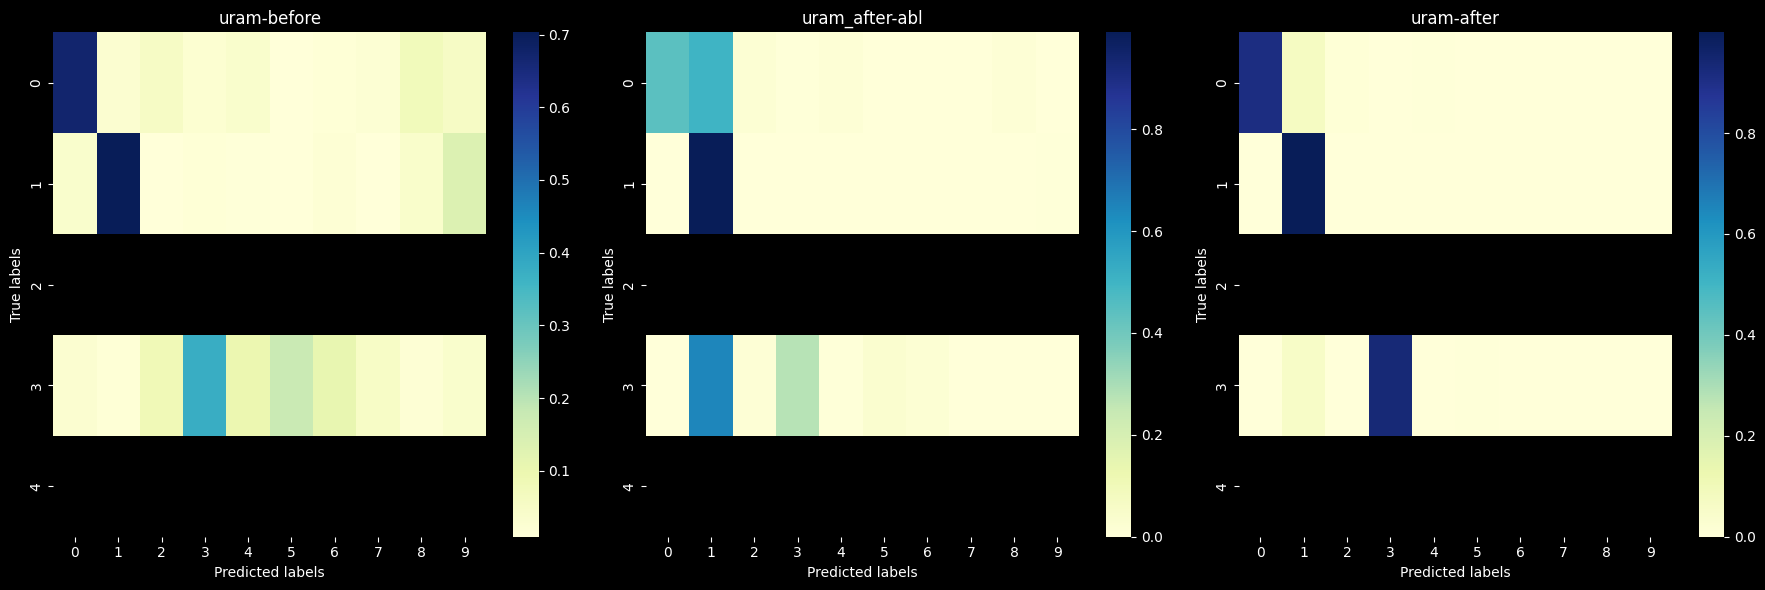

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix
def load_and_compute_cm(predicted_path, true_path):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels) # 归一化方法
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # just get the first 5 lines of the confusion matrix
    cm_normalized = cm_normalized[:5,]
    return cm_normalized

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case
cm_before = load_and_compute_cm(paths["uram-before"]["prd"], paths["uram-before"]["true"])
cm_after_abl = load_and_compute_cm(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"])
cm_after = load_and_compute_cm(paths["uram-after"]["prd"], paths["uram-after"]["true"])

# Plotting the confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_before, annot=False, cmap='YlGnBu', cbar=True, ax=axes[0])
axes[0].set_title('uram-before')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=False, cmap='YlGnBu', cbar=True, ax=axes[1])
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=False, cmap='YlGnBu', cbar=True, ax=axes[2])
axes[2].set_title('uram-after')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


/tmp/ipykernel_85273/3665003516.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_85273/3665003516.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_85273/3665003516.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


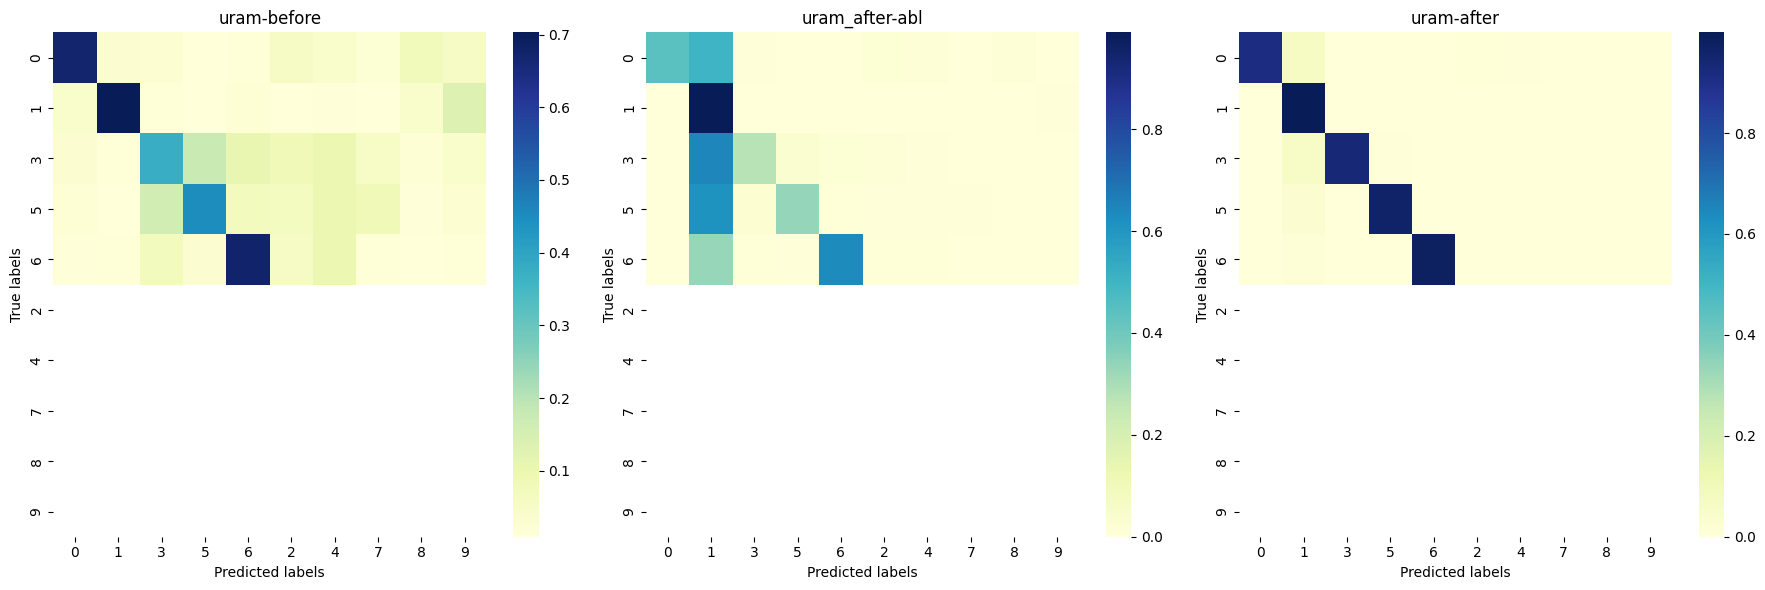

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_before, annot=False, cmap='YlGnBu', cbar=True, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('uram-before')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=False, cmap='YlGnBu', cbar=True, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=False, cmap='YlGnBu', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('uram-after')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


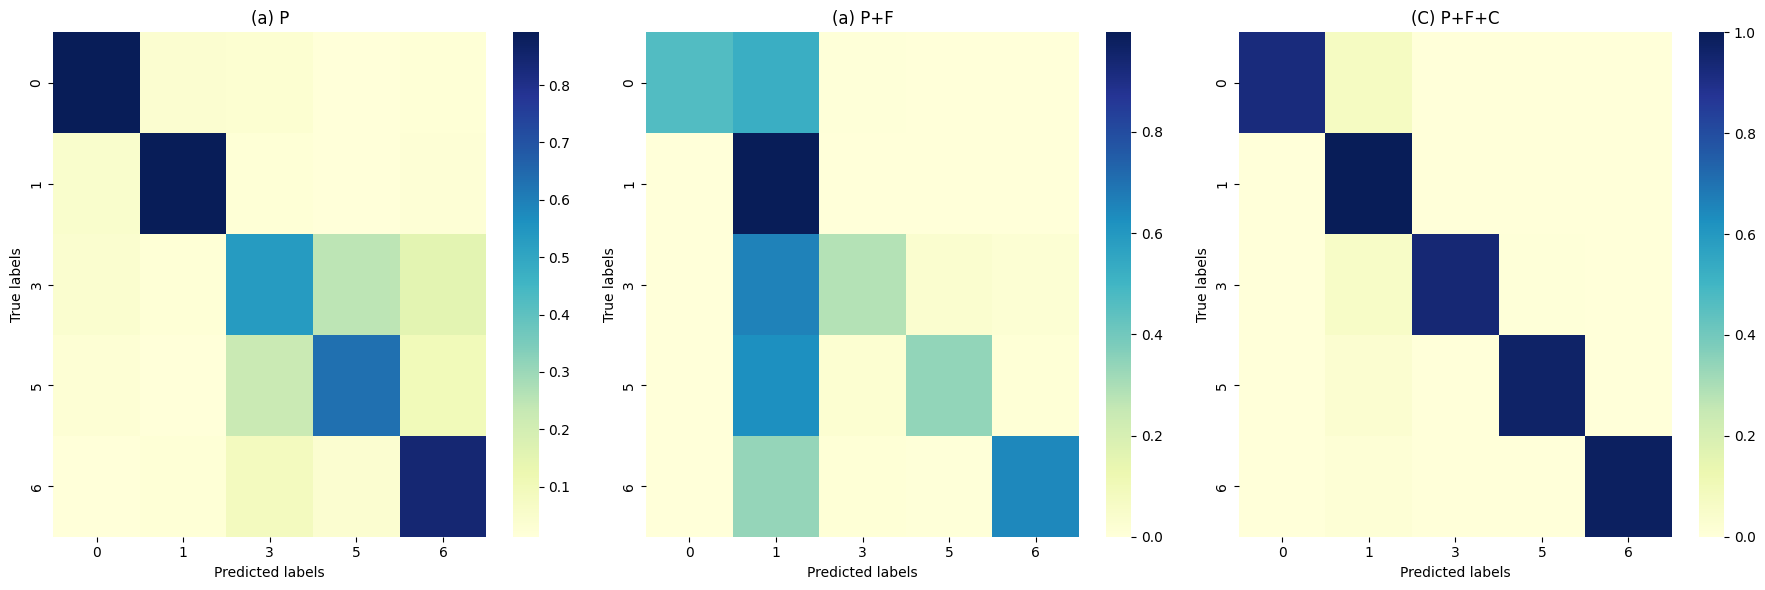

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)


plt.style.use("default")

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_before, annot=False, cmap='YlGnBu', cbar=True, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('(a) P')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=False, cmap='YlGnBu', cbar=True, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('(a) P+F')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=False, cmap='YlGnBu', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('(C) P+F+C')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

# use default style
plt.tight_layout()
plt.show()


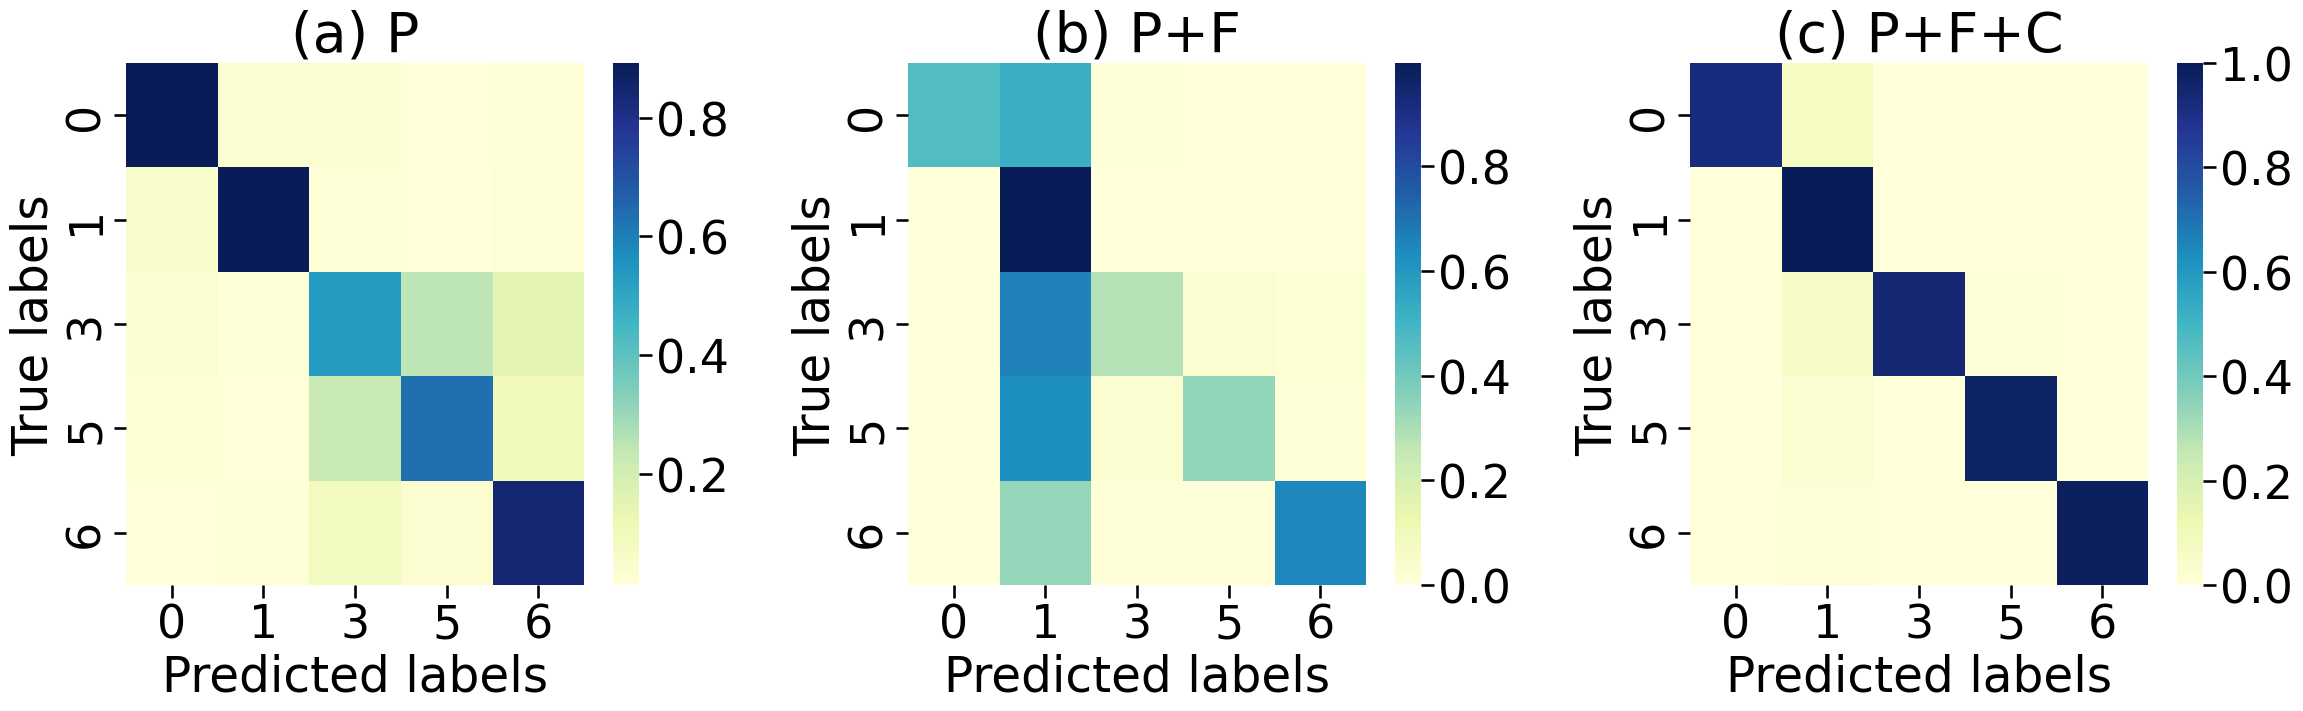

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)


plt.style.use("default")

# Set the font scale to ensure larger font sizes
sns.set_context("talk", font_scale=2)

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

sns.heatmap(cm_before, annot=False, cmap='YlGnBu', cbar=True, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('(a) P', fontsize=40)
axes[0].set_xlabel('Predicted labels', fontsize=35)
axes[0].set_ylabel('True labels', fontsize=35)

sns.heatmap(cm_after_abl, annot=False, cmap='YlGnBu', cbar=True, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('(b) P+F', fontsize=40)
axes[1].set_xlabel('Predicted labels', fontsize=35)
axes[1].set_ylabel('True labels', fontsize=35)

sns.heatmap(cm_after, annot=False, cmap='YlGnBu', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('(c) P+F+C', fontsize=40)
axes[2].set_xlabel('Predicted labels', fontsize=35)
axes[2].set_ylabel('True labels', fontsize=35)

plt.tight_layout()
plt.show()

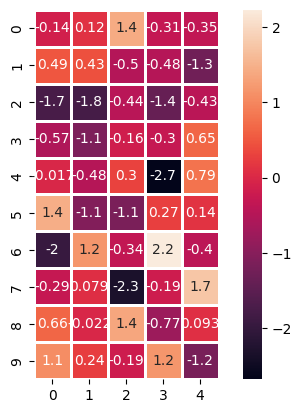

In [5]:
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
mat = np.random.randn(10,5)
sbn.heatmap(mat,linewidth=1,square=True,annot=True)
plt.show()

/tmp/ipykernel_18867/2855732057.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_18867/2855732057.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_18867/2855732057.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


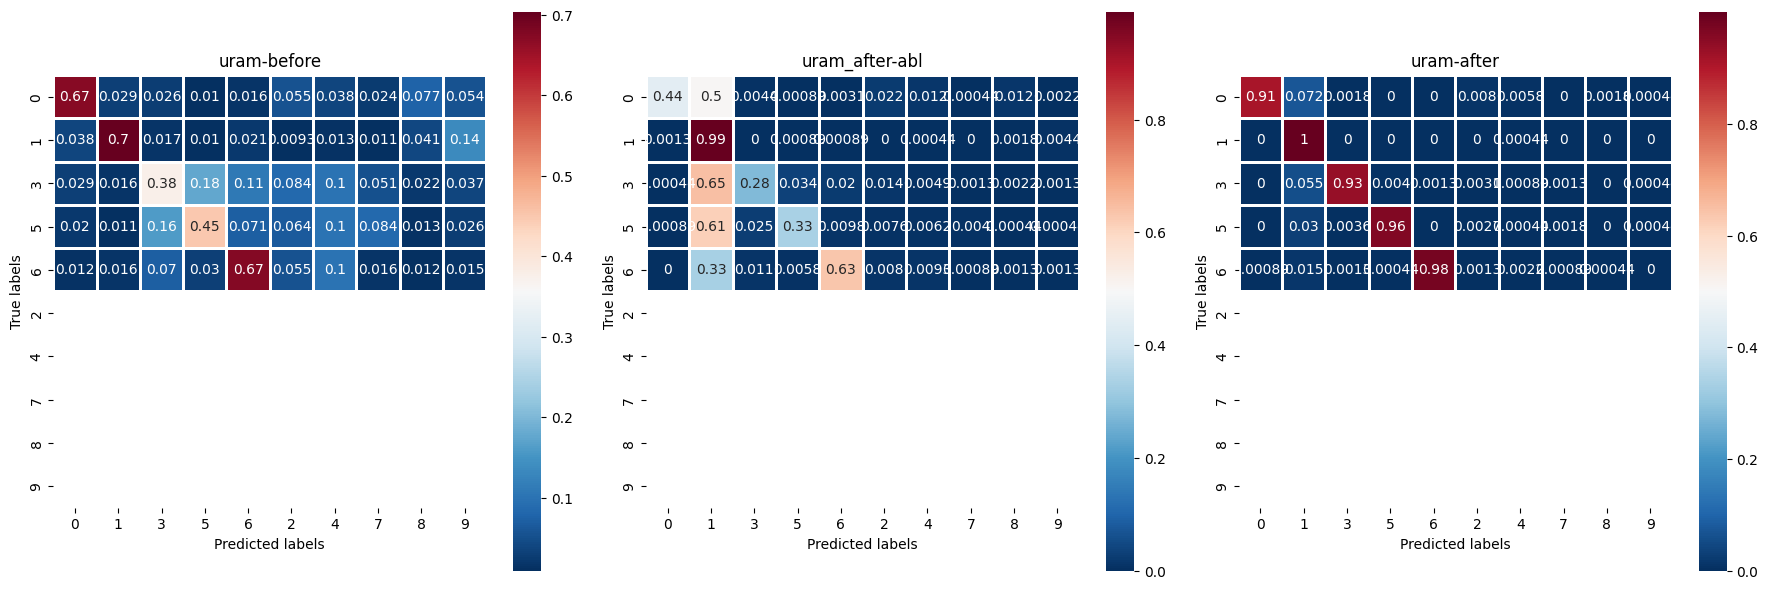

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Set the heatmap style to be similar to the second example
sns.heatmap(cm_before, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('uram-before')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('uram-after')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


/tmp/ipykernel_18867/608217990.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_18867/608217990.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_18867/608217990.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


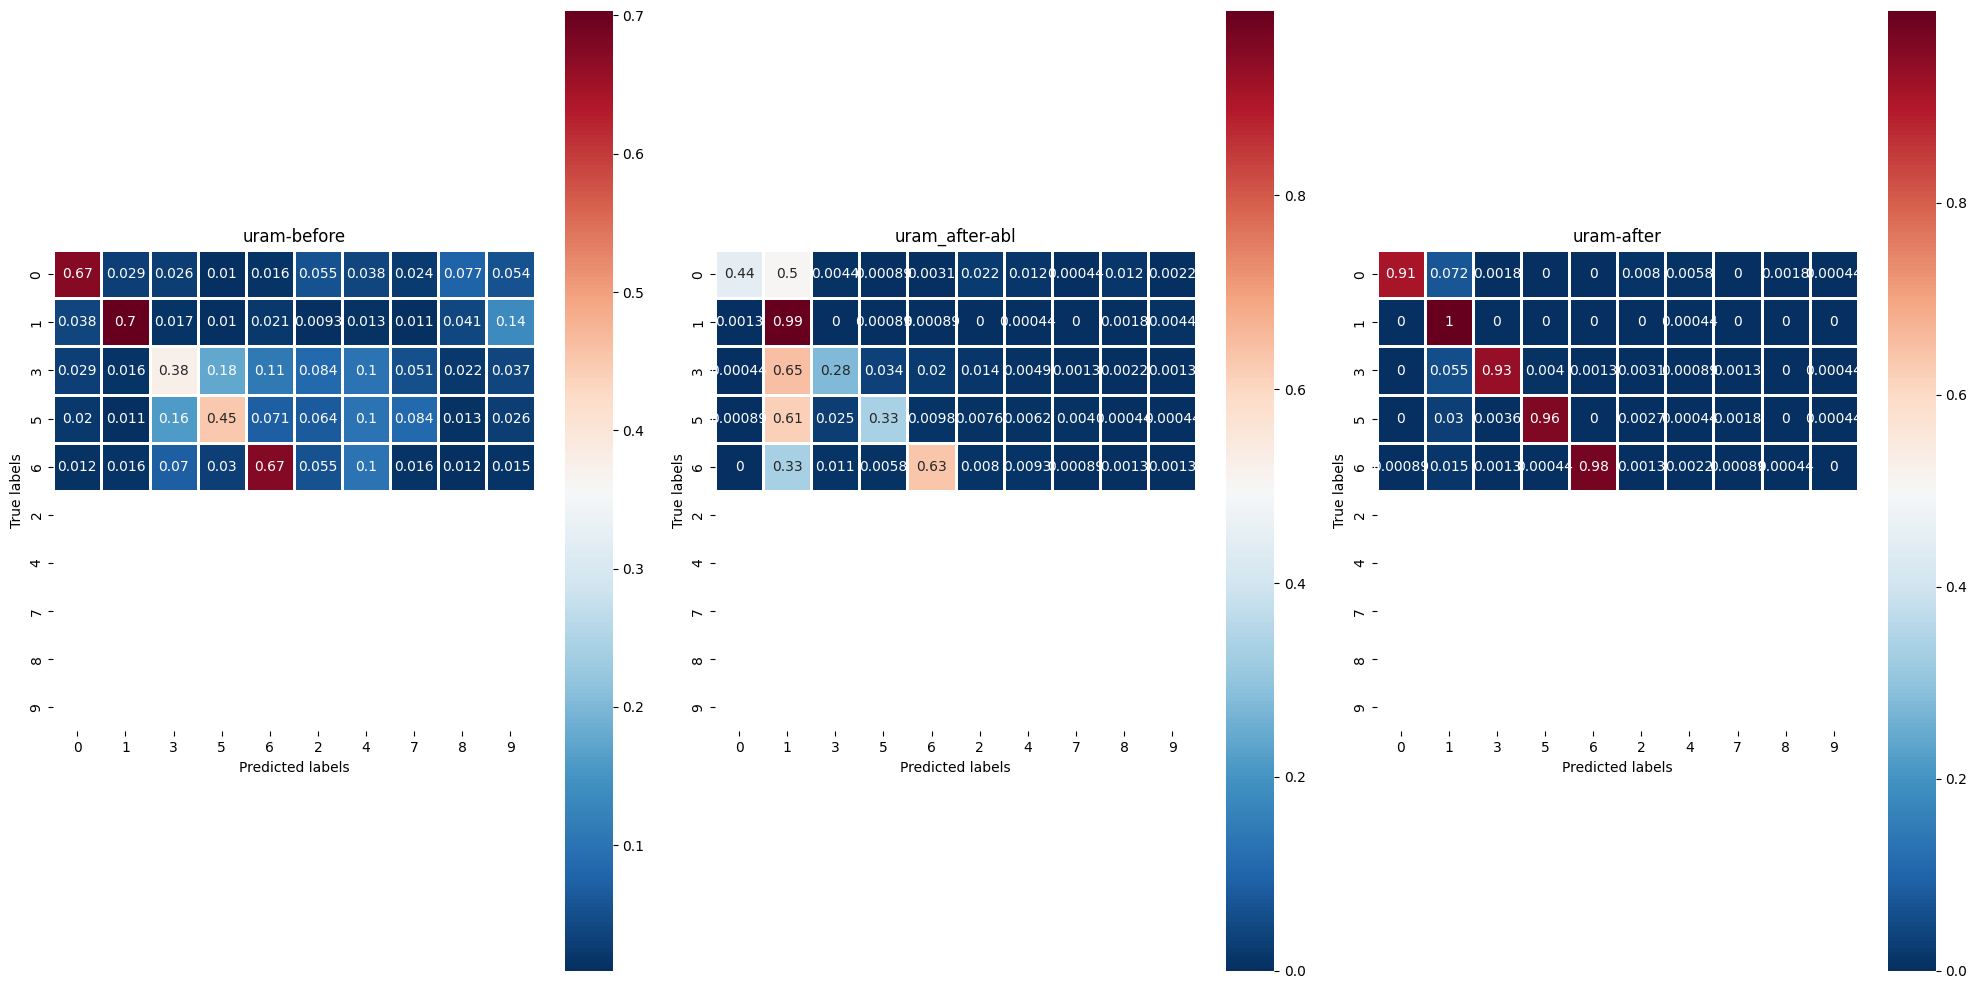

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Set the heatmap style to be similar to the second example
sns.heatmap(cm_before, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('uram-before')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('uram-after')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


/tmp/ipykernel_18867/799398337.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_18867/799398337.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_18867/799398337.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


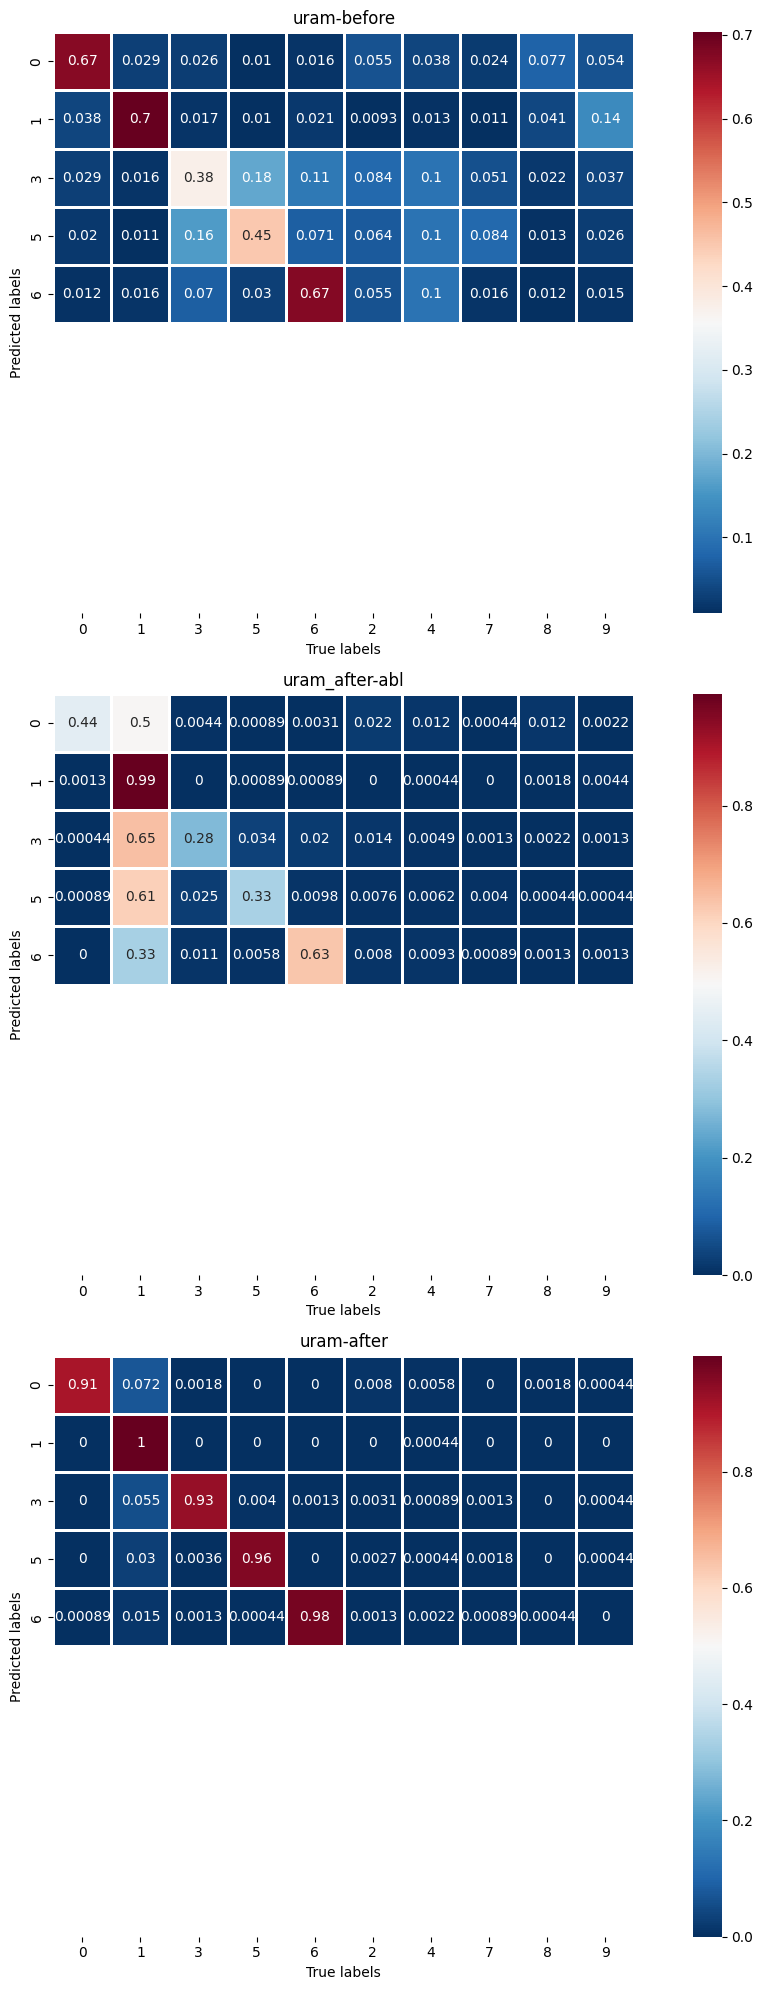

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order_full = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]  # Full list including horizontal labels
new_order_vertical = [0, 1, 3, 5, 6]  # Exclude 2, 4, 7, 8, 9 from vertical labels

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order_full)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order_full)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order_full)

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(3, 1, figsize=(12, 20))

# Set the heatmap style to be similar to the second example, with vertical labels filtered
sns.heatmap(cm_before, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[0], xticklabels=new_order_full, yticklabels=new_order_vertical)
axes[0].set_title('uram-before')
axes[0].set_xlabel('True labels')
axes[0].set_ylabel('Predicted labels')

sns.heatmap(cm_after_abl, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[1], xticklabels=new_order_full, yticklabels=new_order_vertical)
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('True labels')
axes[1].set_ylabel('Predicted labels')

sns.heatmap(cm_after, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[2], xticklabels=new_order_full, yticklabels=new_order_vertical)
axes[2].set_title('uram-after')
axes[2].set_xlabel('True labels')
axes[2].set_ylabel('Predicted labels')

plt.tight_layout()
plt.show()
